# Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
datapath = r'/content/drive/MyDrive/Group05/Regression/UnivariateData/5.csv'

In [ ]:
dataset = np.loadtxt(datapath,delimiter=",")

In [ ]:

def plot(data):  
  x , y = data[:,0] , data[:,1]
  plt.scatter(x, y, color='b',edgecolors='black')  
  plt.title("Univariate Dataset")
  plt.xlabel("input axis")
  plt.ylabel("output axis")
  plt.savefig("/content/drive/MyDrive/Group05/results/1D.png")

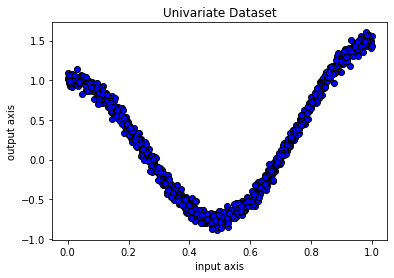

In [ ]:
plot(dataset)

## Train Test Split (70%-30%)

In [ ]:
def train_test_split(data):
  row, col = data.shape
  n = int(0.7*row)
  train = data[:n]
  test = data[n:row]
  return train, test

In [ ]:
train_data, test_data = train_test_split(dataset)


# Perceptron Training Model

In [ ]:
np.random.seed(0)
def perceptron_model_train(train_data):
  N, d = train_data.shape
  theta = np.random.randn(2)
  epochs=100
  avg_err = []
  mse=[]
  while(epochs):
    error=[]   

    for i in range(N):
      
      x = train_data[i,0]
      y_op = train_data[i, 1]
      
      a=np.dot(theta.T,[1,x]) #activation value
      y_pred = a #linear activation function      
      
      eta = 0.001
     
      theta = theta + eta*np.dot(y_op-y_pred,[1,x])
      e = 0.5*(y_op - y_pred)**2
      error.append(e)
      
    avg = sum(error)/len(error)
    avg_err.append(avg)
    epochs = epochs-1
    
  return theta, avg_err


In [ ]:
theta, avg_err = perceptron_model_train(train_data)

Testing

In [ ]:
def perceptron_test(test_data, theta):
    N=len(test_data)
    y_pred_list = []
    err=[]
    for i in range(N):
        y_true = test_data[i, 0]
        y_pred=np.dot(theta.T, [1, test_data[i, 0]])
        e = (y_true-y_pred)**2
        y_pred_list.append(y_pred)
        err.append(e)
    mse=sum(err)/len(err)
    
    return y_pred_list,mse

y_pred_ts, msets = perceptron_test(test_data, theta)
y_pred_tr, msetr = perceptron_test(train_data, theta)
y_pred_all, mse_all = perceptron_test(dataset, theta)

# Results

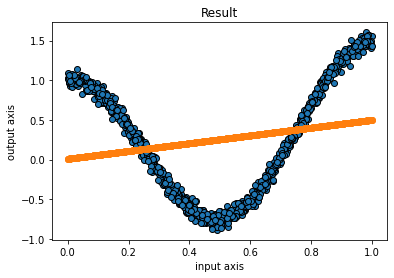

In [ ]:
plt.scatter(dataset[:,0], dataset[:,1],edgecolors="black")
plt.scatter(dataset[:,0], y_pred_all)
plt.title("Result")
plt.xlabel("input axis")
plt.ylabel("output axis")
plt.savefig("/content/drive/MyDrive/Group05/results/regress_result.png")
plt.show()

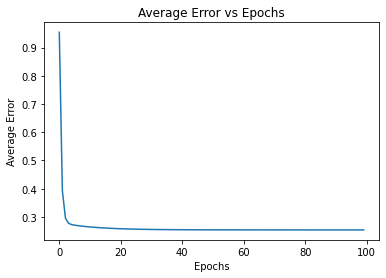

In [ ]:
plt.plot(avg_err)
plt.title("Average Error vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Average Error")
plt.savefig("/content/drive/MyDrive/Group05/results/1Derrorvsepoch.png")
plt.show()

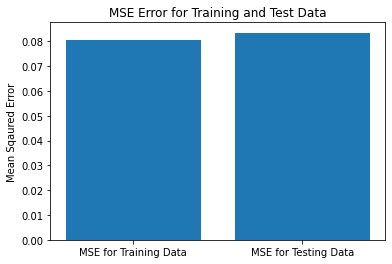

In [ ]:
x=["MSE for Training Data","MSE for Testing Data"]
y=[msetr,msets]

plt.bar(x,y)

plt.title("MSE Error for Training and Test Data")
plt.ylabel("Mean Sqaured Error")
plt.savefig("/content/drive/MyDrive/Group05/results/mse1D.png")
plt.show()

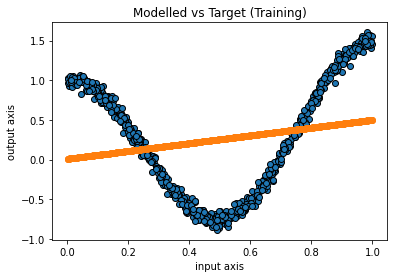

In [ ]:
plt.scatter(train_data[:,0], train_data[:,1],edgecolor='black')
plt.scatter(train_data[:,0],y_pred_tr)
plt.title("Modelled vs Target (Training)")
plt.xlabel("input axis")
plt.ylabel("output axis")
plt.savefig("/content/drive/MyDrive/Group05/results/training_result.png")
plt.show()

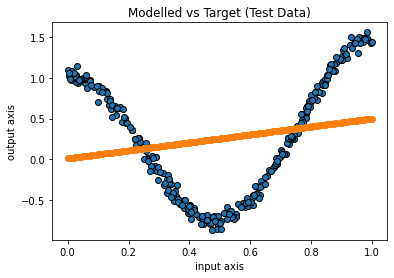

In [ ]:
plt.scatter(test_data[:,0], test_data[:,1],edgecolors="black")
plt.scatter(test_data[:,0], y_pred_ts)
plt.title("Modelled vs Target (Test Data)")
plt.xlabel("input axis")
plt.ylabel("output axis")
plt.savefig("/content/drive/MyDrive/Group05/results/test_result.png")
plt.show()

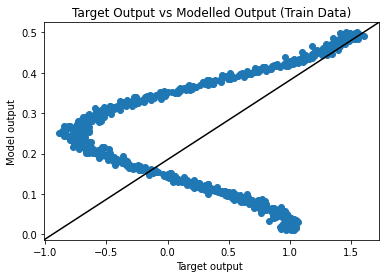

In [ ]:
fig, ax = plt.subplots()
plt.scatter( train_data[:,1],y_pred_tr)
ax.plot([0,1],[0,1], transform=ax.transAxes,color="black")
plt.title("Target Output vs Modelled Output (Train Data)")
plt.xlabel("Target output ")
plt.ylabel("Model output")
plt.savefig("/content/drive/MyDrive/Group05/results/4Univarate_train.png")
plt.show()

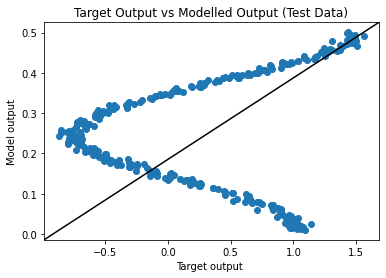

In [ ]:
fig, ax = plt.subplots()
plt.scatter(test_data[:,1],y_pred_ts)
ax.plot([0,1],[0,1], transform=ax.transAxes,color="black")
plt.title("Target Output vs Modelled Output (Test Data)")
plt.xlabel("Target output ")
plt.ylabel("Model output")
plt.savefig("/content/drive/MyDrive/Group05/results/4Univarate_test.png")
plt.show()